#Get Data

In [1]:
!git clone "https://github.com/muhammadikhsan94/challenge-2-dataset"

fatal: destination path 'challenge-2-dataset' already exists and is not an empty directory.


#Preprocessing

In [2]:
import pandas as pd

df = pd.read_csv("/content/challenge-2-dataset/train.csv")

df.head(100)

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,Wiraswasta,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,<=7jt
1,1,49,Wiraswasta,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,<=7jt
2,2,44,Wiraswasta,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,>7jt
3,3,24,Wiraswasta,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,<=7jt
4,4,33,Wiraswasta,219619,Master,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,>7jt
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,57,Wiraswasta,185072,Pendidikan Tinggi,10,Belum Pernah Menikah,Pemuka Agama,Perempuan,0.0,0.0,40.0,<=7jt
96,96,49,Wiraswasta,252079,Pendidikan Tinggi,10,Menikah,Supir,Laki2,0.0,0.0,40.0,>7jt
97,97,57,Pemerintah Lokal,174132,Master,14,Menikah,Spesialis,Perempuan,0.0,27678000.0,40.0,>7jt
98,98,52,Pemerintah Lokal,140027,SMA,9,Janda,Servis Lainnya,Perempuan,0.0,0.0,20.0,<=7jt


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35994 entries, 0 to 35993
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     35994 non-null  int64  
 1   Umur                   35994 non-null  int64  
 2   Kelas Pekerja          35994 non-null  object 
 3   Berat Akhir            35994 non-null  int64  
 4   Pendidikan             35994 non-null  object 
 5   Jmlh Tahun Pendidikan  35994 non-null  int64  
 6   Status Perkawinan      35994 non-null  object 
 7   Pekerjaan              35994 non-null  object 
 8   Jenis Kelamin          35994 non-null  object 
 9   Keuntungan Kapital     35994 non-null  float64
 10  Kerugian Capital       35994 non-null  float64
 11  Jam per Minggu         35994 non-null  float64
 12  Gaji                   35994 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 3.6+ MB


In [4]:
df['Gaji'].value_counts()

<=7jt    27364
>7jt      8630
Name: Gaji, dtype: int64

In [5]:
duplicateDFRow = df[df.duplicated(keep='last')]

In [6]:
print(duplicateDFRow)

Empty DataFrame
Columns: [id, Umur, Kelas Pekerja, Berat Akhir, Pendidikan, Jmlh Tahun Pendidikan, Status Perkawinan, Pekerjaan, Jenis Kelamin, Keuntungan Kapital, Kerugian Capital, Jam per Minggu, Gaji]
Index: []


In [7]:
df[['Pendidikan','Jmlh Tahun Pendidikan']].head(10).sort_values(by='Jmlh Tahun Pendidikan')

,Pendidikan,Jmlh Tahun Pendidikan
1,10th,6
0,SMA,9
7,SMA,9
9,SMA,9
6,Pendidikan Tinggi,10
8,Pendidikan Tinggi,10
2,D3,12
3,Sarjana,13
5,Sarjana,13
4,Master,14


##Visualisasi Data

In [8]:
df['Pekerjaan'].unique()

array(['Servis Lainnya', 'Ekesekutif Managerial', 'Spesialis',
       'Perbaikan Kerajinan', '?', 'Sales', 'Pembersih', 'Pemuka Agama',
       'Petani', 'Tech-support', 'Mesin Inspeksi', 'Supir',
       'Asisten Rumah Tangga', 'Penjaga', 'Tentara'], dtype=object)

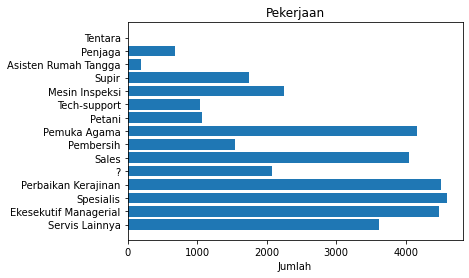

In [9]:
pekerjaan = []
value = []
for i in df['Pekerjaan'].unique():
    pekerjaan.append(i)
    value.append(df['Pekerjaan'].where(df['Pekerjaan'] == i).count())

import matplotlib.pyplot as plt
import numpy as np

y_pos = np.arange(len(pekerjaan))
plt.barh(pekerjaan, value, align='center', height=0.8)
plt.yticks(y_pos, pekerjaan)
plt.xlabel('Jumlah')
plt.title('Pekerjaan')

plt.show()

In [10]:
df['Umur'].sort_values().unique()

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 90])

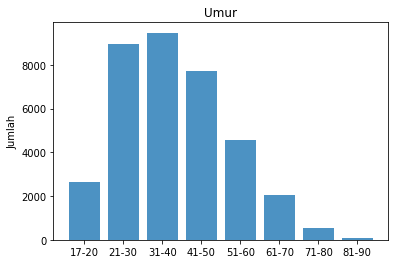

In [11]:
umur = ['17-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
jmlh_umur = []

jmlh_umur.append(df['Umur'].where(df['Umur'] <= 20).count())
jmlh_umur.append(df['Umur'].where((df['Umur'] <= 30) & (df['Umur'] > 20)).count())
jmlh_umur.append(df['Umur'].where((df['Umur'] <= 40) & (df['Umur'] > 30)).count())
jmlh_umur.append(df['Umur'].where((df['Umur'] <= 50) & (df['Umur'] > 40)).count())
jmlh_umur.append(df['Umur'].where((df['Umur'] <= 60) & (df['Umur'] > 50)).count())
jmlh_umur.append(df['Umur'].where((df['Umur'] <= 70) & (df['Umur'] > 60)).count())
jmlh_umur.append(df['Umur'].where((df['Umur'] <= 80) & (df['Umur'] > 70)).count())
jmlh_umur.append(df['Umur'].where((df['Umur'] <= 90) & (df['Umur'] > 80)).count())

y_pos = np.arange(len(umur))
plt.bar(umur, jmlh_umur, align='center', alpha=0.8)
plt.xticks(y_pos, umur)
plt.ylabel('Jumlah')
plt.title('Umur')

plt.show()

In [12]:
df['Jenis Kelamin'].unique()

array(['Perempuan', 'Laki2'], dtype=object)

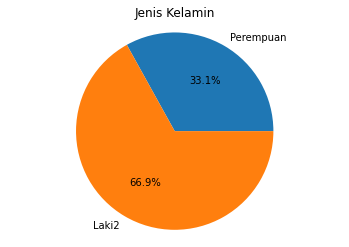

In [13]:
jk = ['Perempuan', 'Laki2']
jmlh_jk = []

jmlh_jk.append(df['Jenis Kelamin'].where(df['Jenis Kelamin'] == jk[0]).count())
jmlh_jk.append(df['Jenis Kelamin'].where(df['Jenis Kelamin'] == jk[1]).count())

plt.pie(jmlh_jk, labels=jk, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Jenis Kelamin')
plt.show()

In [14]:
df['Status Perkawinan'].unique()

array(['Belum Pernah Menikah', 'Cerai', 'Menikah', 'Janda', 'Berpisah',
       'Menikah LDR'], dtype=object)

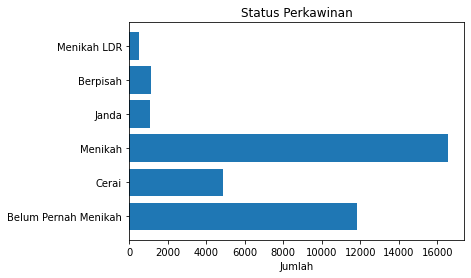

In [15]:
data_nikah = []
jmlh_nikah = []
for i in df['Status Perkawinan'].unique():
    data_nikah.append(i)
    jmlh_nikah.append(df['Status Perkawinan'].where(df['Status Perkawinan'] == i).count())

y_pos = np.arange(len(data_nikah))
plt.barh(data_nikah, jmlh_nikah, align='center', height=0.8)
plt.yticks(y_pos, data_nikah)
plt.xlabel('Jumlah')
plt.title('Status Perkawinan')

plt.show()

In [16]:
df['Pendidikan'].unique()

array(['SMA', '10th', 'D3', 'Sarjana', 'Master', 'Pendidikan Tinggi',
       '1st-4th', 'Sekolah Professional', '7th-8th', 'Doktor', '5th-6th',
       '11th', '9th', 'D4', '12th', 'SD'], dtype=object)

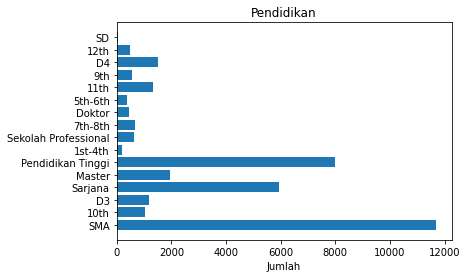

In [18]:
pendidikan = []
jmlh_pendidikan = []
for i in df['Pendidikan'].unique():
    pendidikan.append(i)
    jmlh_pendidikan.append(df['Pendidikan'].where(df['Pendidikan'] == i).count())

y_pos = np.arange(len(pendidikan))
plt.barh(pendidikan, jmlh_pendidikan, align='center', height=0.8)
plt.yticks(y_pos, pendidikan)
plt.xlabel('Jumlah')
plt.title('Pendidikan')

plt.show()

##Drop Column and Delete Missing Value

In [19]:
#drop column id, Berat Akhir, Pendidikan
df = df.drop(columns=['id', 'Berat Akhir', 'Pendidikan'])

#seleksi nilai yang tidak terdapat missing value
df = df[df.Pekerjaan != "?"]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33925 entries, 0 to 35993
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Umur                   33925 non-null  int64  
 1   Kelas Pekerja          33925 non-null  object 
 2   Jmlh Tahun Pendidikan  33925 non-null  int64  
 3   Status Perkawinan      33925 non-null  object 
 4   Pekerjaan              33925 non-null  object 
 5   Jenis Kelamin          33925 non-null  object 
 6   Keuntungan Kapital     33925 non-null  float64
 7   Kerugian Capital       33925 non-null  float64
 8   Jam per Minggu         33925 non-null  float64
 9   Gaji                   33925 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 2.8+ MB


##Label Encoder

In [21]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Gaji'] = encoder.fit_transform(df['Gaji'])
df['Kelas Pekerja'] = np.where((df['Kelas Pekerja'] == "Tanpa di Bayar") | (df['Kelas Pekerja'] == "Tidak Pernah Bekerja"), 0, 1)

In [23]:
df_encoded = pd.get_dummies(df, columns=['Status Perkawinan','Pekerjaan', 'Jenis Kelamin'])
df_encoded

,Umur,Kelas Pekerja,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji,Status Perkawinan_Belum Pernah Menikah,Status Perkawinan_Berpisah,Status Perkawinan_Cerai,Status Perkawinan_Janda,Status Perkawinan_Menikah,Status Perkawinan_Menikah LDR,Pekerjaan_Asisten Rumah Tangga,Pekerjaan_Ekesekutif Managerial,Pekerjaan_Mesin Inspeksi,Pekerjaan_Pembersih,Pekerjaan_Pemuka Agama,Pekerjaan_Penjaga,Pekerjaan_Perbaikan Kerajinan,Pekerjaan_Petani,Pekerjaan_Sales,Pekerjaan_Servis Lainnya,Pekerjaan_Spesialis,Pekerjaan_Supir,Pekerjaan_Tech-support,Pekerjaan_Tentara,Jenis Kelamin_Laki2,Jenis Kelamin_Perempuan
0,21,1,9,0.0,0.0,35.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,49,1,6,0.0,0.0,40.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,44,1,12,61404000.0,0.0,45.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,24,1,13,0.0,0.0,35.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,33,1,14,210336000.0,0.0,40.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35989,47,1,9,0.0,0.0,40.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
35990,69,1,12,0.0,0.0,40.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
35991,24,1,13,0.0,0.0,20.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
35992,47,1,9,0.0,0.0,45.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [24]:
df_encoded.columns

Index(['Umur', 'Kelas Pekerja', 'Jmlh Tahun Pendidikan', 'Keuntungan Kapital',
       'Kerugian Capital', 'Jam per Minggu', 'Gaji',
       'Status Perkawinan_Belum Pernah Menikah', 'Status Perkawinan_Berpisah',
       'Status Perkawinan_Cerai', 'Status Perkawinan_Janda',
       'Status Perkawinan_Menikah', 'Status Perkawinan_Menikah LDR',
       'Pekerjaan_Asisten Rumah Tangga', 'Pekerjaan_Ekesekutif Managerial',
       'Pekerjaan_Mesin Inspeksi', 'Pekerjaan_Pembersih',
       'Pekerjaan_Pemuka Agama', 'Pekerjaan_Penjaga',
       'Pekerjaan_Perbaikan Kerajinan', 'Pekerjaan_Petani', 'Pekerjaan_Sales',
       'Pekerjaan_Servis Lainnya', 'Pekerjaan_Spesialis', 'Pekerjaan_Supir',
       'Pekerjaan_Tech-support', 'Pekerjaan_Tentara', 'Jenis Kelamin_Laki2',
       'Jenis Kelamin_Perempuan'],
      dtype='object')

##Correlation

In [25]:
correlation_df = df_encoded.corr()
correlation_df

,Umur,Kelas Pekerja,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji,Status Perkawinan_Belum Pernah Menikah,Status Perkawinan_Berpisah,Status Perkawinan_Cerai,Status Perkawinan_Janda,Status Perkawinan_Menikah,Status Perkawinan_Menikah LDR,Pekerjaan_Asisten Rumah Tangga,Pekerjaan_Ekesekutif Managerial,Pekerjaan_Mesin Inspeksi,Pekerjaan_Pembersih,Pekerjaan_Pemuka Agama,Pekerjaan_Penjaga,Pekerjaan_Perbaikan Kerajinan,Pekerjaan_Petani,Pekerjaan_Sales,Pekerjaan_Servis Lainnya,Pekerjaan_Spesialis,Pekerjaan_Supir,Pekerjaan_Tech-support,Pekerjaan_Tentara,Jenis Kelamin_Laki2,Jenis Kelamin_Perempuan
Umur,1.000000,-0.015977,0.039558,0.081476,0.055280,0.101104,0.239058,-0.525992,0.017598,0.133544,0.250937,0.308645,0.013023,0.029396,0.110225,-0.013955,-0.094097,-0.039463,0.005009,0.012032,0.039078,-0.035951,-0.090497,0.059907,0.034976,-0.020630,-0.011236,0.082134,-0.082134
Kelas Pekerja,-0.015977,1.000000,0.012547,0.001834,-0.001962,0.016081,0.008853,-0.000494,0.003783,0.008396,-0.004960,-0.002771,-0.009737,0.001566,0.008205,-0.005664,-0.002149,-0.000691,0.003021,0.004101,-0.052200,0.007737,0.002719,0.008316,-0.001463,0.003744,0.000379,0.003433,-0.003433
Jmlh Tahun Pendidikan,0.039558,0.012547,1.000000,0.122734,0.081988,0.144228,0.332104,-0.029595,-0.049627,-0.002194,-0.062547,0.073658,-0.028042,-0.077161,0.201775,-0.170626,-0.133898,-0.000498,-0.001668,-0.157720,-0.112072,0.029788,-0.183184,0.424920,-0.122761,0.057258,0.004176,0.006639,-0.006639
Keuntungan Kapital,0.081476,0.001834,0.122734,1.000000,-0.032235,0.084042,0.222236,-0.065548,-0.012338,-0.011379,-0.010659,0.077568,-0.002129,-0.009134,0.058977,-0.027598,-0.022836,-0.030495,-0.009885,-0.020893,-0.010077,0.010527,-0.041723,0.082115,-0.019515,-0.009762,-0.002666,0.046314,-0.046314
Kerugian Capital,0.055280,-0.001962,0.081988,-0.032235,1.000000,0.061226,0.146220,-0.058354,-0.012403,-0.025245,-0.004980,0.079360,-0.005659,-0.012999,0.045352,-0.011314,-0.020281,-0.019596,-0.002425,-0.006038,-0.012704,0.009429,-0.040980,0.044137,-0.008821,0.000369,0.003717,0.050611,-0.050611
Jam per Minggu,0.101104,0.016081,0.144228,0.084042,0.061226,1.000000,0.223201,-0.212775,-0.012863,0.014235,-0.082839,0.224191,-0.012533,-0.051062,0.133904,-0.000946,-0.056424,-0.100933,0.020036,0.043189,0.086874,-0.007316,-0.177243,0.042921,0.073307,-0.017591,0.003476,0.227352,-0.227352
Gaji,0.239058,0.008853,0.332104,0.222236,0.146220,0.223201,1.000000,-0.318917,-0.071343,-0.133332,-0.062545,0.443958,-0.033264,-0.040057,0.206297,-0.072987,-0.093315,-0.089552,0.019613,-0.024584,-0.057004,0.018050,-0.167465,0.183454,-0.021877,0.020152,0.004795,0.211689,-0.211689
Status Perkawinan_Belum Pernah Menikah,-0.525992,-0.000494,-0.029595,-0.065548,-0.058354,-0.212775,-0.318917,1.000000,-0.124048,-0.275328,-0.116751,-0.646367,-0.080417,0.012538,-0.097324,-0.021620,0.075914,0.077819,-0.020673,-0.092883,-0.010025,0.026156,0.131159,-0.018012,-0.056945,0.011369,0.005094,-0.177107,0.177107
Status Perkawinan_Berpisah,0.017598,0.003783,-0.049627,-0.012338,-0.012403,-0.012863,-0.071343,-0.124048,1.000000,-0.071796,-0.030445,-0.168550,-0.020970,0.023173,-0.020692,0.015977,0.004670,0.010687,-0.005403,-0.010080,-0.019034,-0.010816,0.051396,-0.015204,-0.012692,0.000343,-0.003239,-0.106316,0.106316
Status Perkawinan_Cerai,0.133544,0.008396,-0.002194,-0.011379,-0.025245,0.014235,-0.133332,-0.275328,-0.071796,1.000000,-0.067573,-0.374102,-0.046543,0.013062,0.011147,0.002318,-0.027008,0.079485,-0.006259,-0.025850,-0.042449,-0.017397,0.012518,-0.010887,-0.020680,0.008820,-0.007189,-0.236945,0.236945


#Split Train & Test Data

In [26]:
X = df_encoded.drop(columns=['Gaji']).values
Y = df_encoded.iloc[:, 6].values

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
X_train

array([[-0.12187087,  0.01919885,  0.7243306 , ..., -0.01717134,
        -1.44789715,  1.44789715],
       [-0.04591846,  0.01919885, -0.0530012 , ..., -0.01717134,
         0.69065679, -0.69065679],
       [-1.41306174,  0.01919885, -0.4416671 , ..., -0.01717134,
         0.69065679, -0.69065679],
       ...,
       [-0.42568048,  0.01919885, -0.4416671 , ..., -0.01717134,
         0.69065679, -0.69065679],
       [ 1.16932001,  0.01919885, -0.4416671 , ..., -0.01717134,
        -1.44789715,  1.44789715],
       [ 0.18193875,  0.01919885,  0.3356647 , ..., -0.01717134,
         0.69065679, -0.69065679]])

#Classification Models

In [30]:
import seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

##RandomForest

In [43]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

Mean Absolute Error: 0.15401621223286663
Mean Squared Error: 0.15401621223286663
Root Mean Squared Error: 0.3924489931607248


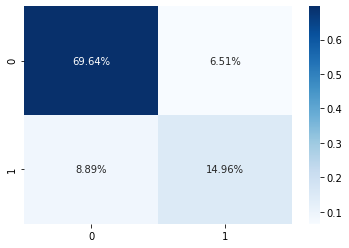

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      5167
           1       0.70      0.63      0.66      1618

    accuracy                           0.85      6785
   macro avg       0.79      0.77      0.78      6785
weighted avg       0.84      0.85      0.84      6785



In [45]:
acc_rf = confusion_matrix(y_test, y_pred_rf.round())

seaborn.heatmap(acc_rf/np.sum(acc_rf), annot=True, fmt='.2%', cmap='Blues')
plt.show()

print(classification_report(y_test, y_pred_rf.round()))

##Decission Tree

In [46]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)

In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_tree))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_tree))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree)))

Mean Absolute Error: 0.1770081061164333
Mean Squared Error: 0.1770081061164333
Root Mean Squared Error: 0.4207233130175143


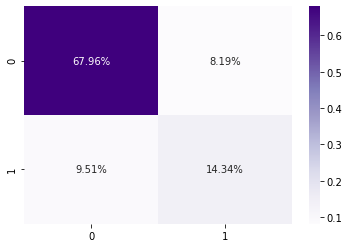

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      5167
           1       0.64      0.60      0.62      1618

    accuracy                           0.82      6785
   macro avg       0.76      0.75      0.75      6785
weighted avg       0.82      0.82      0.82      6785



In [48]:
acc_tree = confusion_matrix(y_test, y_pred_tree)

seaborn.heatmap(acc_tree/np.sum(acc_tree), annot=True, fmt='.2%', cmap='Purples')
plt.show()

print(classification_report(y_test, y_pred_tree))

##Logistic Regression

In [49]:
logreg = LogisticRegression(solver='lbfgs')
logreg = logreg.fit(X_train, y_train)

y_pred_lg = logreg.predict(X_test)

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lg)))

Mean Absolute Error: 0.14576271186440679
Mean Squared Error: 0.14576271186440679
Root Mean Squared Error: 0.3817888315082132


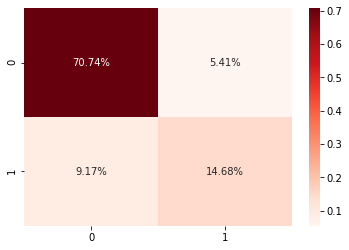

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5167
           1       0.73      0.62      0.67      1618

    accuracy                           0.85      6785
   macro avg       0.81      0.77      0.79      6785
weighted avg       0.85      0.85      0.85      6785



In [51]:
acc_lg = confusion_matrix(y_test, y_pred_lg)

seaborn.heatmap(acc_lg/np.sum(acc_lg), annot=True, fmt='.2%', cmap='Reds')
plt.show()

print(classification_report(y_test, y_pred_lg))

##Support Vector Machine

In [52]:
clf = svm.SVC(kernel='linear')
clf = clf.fit(X_train, y_train)

y_pred_clf = clf.predict(X_test)

In [53]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_clf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_clf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_clf)))

Mean Absolute Error: 0.14738393515106854
Mean Squared Error: 0.14738393515106854
Root Mean Squared Error: 0.38390615409376877


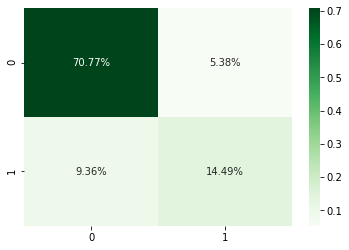

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      5167
           1       0.73      0.61      0.66      1618

    accuracy                           0.85      6785
   macro avg       0.81      0.77      0.78      6785
weighted avg       0.85      0.85      0.85      6785



In [54]:
acc_clf = confusion_matrix(y_test, y_pred_clf)

seaborn.heatmap(acc_clf/np.sum(acc_clf), annot=True, fmt='.2%', cmap='Greens')
plt.show()

print(classification_report(y_test, y_pred_clf))

##K-Neareast Neighbors

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

Mean Absolute Error: 0.17022844509948415
Mean Squared Error: 0.17022844509948415
Root Mean Squared Error: 0.4125874999312075


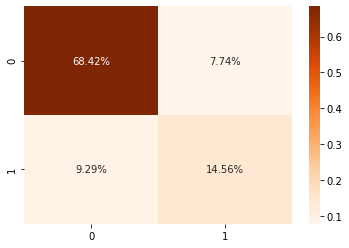

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5167
           1       0.65      0.61      0.63      1618

    accuracy                           0.83      6785
   macro avg       0.77      0.75      0.76      6785
weighted avg       0.83      0.83      0.83      6785



In [57]:
acc_knn = confusion_matrix(y_test, y_pred_knn)

seaborn.heatmap(acc_knn/np.sum(acc_knn), annot=True, fmt='.2%', cmap='Oranges')
plt.show()

print(classification_report(y_test, y_pred_knn))

Mean Absolute Error: 0.16610169491525423
Mean Squared Error: 0.16610169491525423
Root Mean Squared Error: 0.4075557568177074


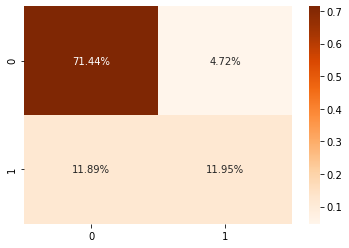

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5167
           1       0.72      0.50      0.59      1618

    accuracy                           0.83      6785
   macro avg       0.79      0.72      0.74      6785
weighted avg       0.82      0.83      0.82      6785



In [58]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))


acc_knn = confusion_matrix(y_test, y_pred_knn)

seaborn.heatmap(acc_knn/np.sum(acc_knn), annot=True, fmt='.2%', cmap='Oranges')
plt.show()

print(classification_report(y_test, y_pred_knn))

Mean Absolute Error: 0.16462785556374354
Mean Squared Error: 0.16462785556374354
Root Mean Squared Error: 0.4057435835151845


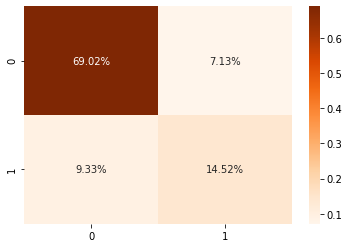

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      5167
           1       0.67      0.61      0.64      1618

    accuracy                           0.84      6785
   macro avg       0.78      0.76      0.77      6785
weighted avg       0.83      0.84      0.83      6785



In [59]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))


acc_knn = confusion_matrix(y_test, y_pred_knn)

seaborn.heatmap(acc_knn/np.sum(acc_knn), annot=True, fmt='.2%', cmap='Oranges')
plt.show()

print(classification_report(y_test, y_pred_knn))

Mean Absolute Error: 0.16330140014738392
Mean Squared Error: 0.16330140014738392
Root Mean Squared Error: 0.404105679429755


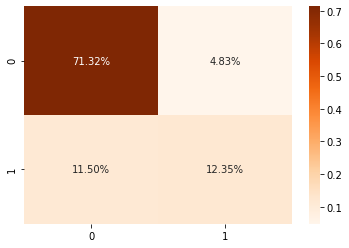

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5167
           1       0.72      0.52      0.60      1618

    accuracy                           0.84      6785
   macro avg       0.79      0.73      0.75      6785
weighted avg       0.83      0.84      0.83      6785



In [60]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))


acc_knn = confusion_matrix(y_test, y_pred_knn)

seaborn.heatmap(acc_knn/np.sum(acc_knn), annot=True, fmt='.2%', cmap='Oranges')
plt.show()

print(classification_report(y_test, y_pred_knn))

#Testing

##Data Preparation

In [61]:
df_test = pd.read_csv('/content/challenge-2-dataset/test.csv')
df_test

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,35994,30,Pemerintah Lokal,99761,D4,11,Cerai,Pemuka Agama,Perempuan,0.0,0.0,40.0
1,35995,28,Wiraswasta,202206,SMA,9,Menikah,Mesin Inspeksi,Laki2,0.0,0.0,50.0
2,35996,34,Pemerintah Provinsi,199934,Pendidikan Tinggi,10,Menikah,Pemuka Agama,Laki2,0.0,0.0,40.0
3,35997,51,Wiraswasta,373448,Pendidikan Tinggi,10,Menikah,Ekesekutif Managerial,Laki2,0.0,28028000.0,40.0
4,35998,20,?,144685,Pendidikan Tinggi,10,Belum Pernah Menikah,?,Perempuan,0.0,22428000.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9594,45588,58,Pemerintah Negara,159021,9th,5,Menikah,Petani,Laki2,0.0,0.0,40.0
9595,45589,45,Pekerja Bebas Bukan Perusahan,144086,11th,7,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,50.0
9596,45590,20,Wiraswasta,238685,Pendidikan Tinggi,10,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,32.0
9597,45591,41,Pemerintah Lokal,249039,SMA,9,Berpisah,Pemuka Agama,Perempuan,0.0,0.0,40.0


In [62]:
#drop column id, Berat Akhir, Pendidikan
df_test = df_test.drop(columns=['id', 'Berat Akhir', 'Pendidikan'])

#seleksi nilai yang tidak terdapat missing value
df_test = df_test[df_test.Pekerjaan != "?"]

In [63]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9045 entries, 0 to 9598
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Umur                   9045 non-null   int64  
 1   Kelas Pekerja          9045 non-null   object 
 2   Jmlh Tahun Pendidikan  9045 non-null   int64  
 3   Status Perkawinan      9045 non-null   object 
 4   Pekerjaan              9045 non-null   object 
 5   Jenis Kelamin          9045 non-null   object 
 6   Keuntungan Kapital     9045 non-null   float64
 7   Kerugian Capital       9045 non-null   float64
 8   Jam per Minggu         9045 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 706.6+ KB


In [65]:
df_test['Kelas Pekerja'] = np.where((df_test['Kelas Pekerja'] == "Tanpa di Bayar") | (df_test['Kelas Pekerja'] == "Tidak Pernah Bekerja"), 0, 1)

df_test = pd.get_dummies(df_test, columns=['Status Perkawinan','Pekerjaan', 'Jenis Kelamin'])
df_test

,Umur,Kelas Pekerja,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Status Perkawinan_Belum Pernah Menikah,Status Perkawinan_Berpisah,Status Perkawinan_Cerai,Status Perkawinan_Janda,Status Perkawinan_Menikah,Status Perkawinan_Menikah LDR,Pekerjaan_Asisten Rumah Tangga,Pekerjaan_Ekesekutif Managerial,Pekerjaan_Mesin Inspeksi,Pekerjaan_Pembersih,Pekerjaan_Pemuka Agama,Pekerjaan_Penjaga,Pekerjaan_Perbaikan Kerajinan,Pekerjaan_Petani,Pekerjaan_Sales,Pekerjaan_Servis Lainnya,Pekerjaan_Spesialis,Pekerjaan_Supir,Pekerjaan_Tech-support,Pekerjaan_Tentara,Jenis Kelamin_Laki2,Jenis Kelamin_Perempuan
0,30,1,11,0.0,0.0,40.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,28,1,9,0.0,0.0,50.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,34,1,10,0.0,0.0,40.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,51,1,10,0.0,28028000.0,40.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,51,1,10,102172000.0,0.0,40.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594,58,1,5,0.0,0.0,40.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
9595,45,1,7,0.0,0.0,50.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9596,20,1,10,0.0,0.0,32.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9597,41,1,9,0.0,0.0,40.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [67]:
data_test = sc.transform(df_test)
data_test

array([[-0.6535377 ,  0.01919885,  0.3356647 , ..., -0.01717134,
        -1.44789715,  1.44789715],
       [-0.80544251,  0.01919885, -0.4416671 , ..., -0.01717134,
         0.69065679, -0.69065679],
       [-0.34972808,  0.01919885, -0.0530012 , ..., -0.01717134,
         0.69065679, -0.69065679],
       ...,
       [-1.41306174,  0.01919885, -0.0530012 , ..., -0.01717134,
        -1.44789715,  1.44789715],
       [ 0.18193875,  0.01919885, -0.4416671 , ..., -0.01717134,
        -1.44789715,  1.44789715],
       [-0.34972808,  0.01919885, -0.4416671 , ..., -0.01717134,
         0.69065679, -0.69065679]])

##Predict

In [70]:
#Random Forest
pred_rf = rf.predict(data_test)
pred_rf

array([0, 1, 1, ..., 0, 0, 0])

In [72]:
#Decission Tree
pred_dct = dtree.predict(data_test)
pred_dct

array([0, 0, 1, ..., 0, 0, 1])

In [74]:
#Logistic Regression
pred_lr = logreg.predict(data_test)
pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
#SVM
pred_svm = clf.predict(data_test)
pred_svm

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
#KNN
pred_knn = knn.predict(data_test)
pred_knn

array([0, 0, 0, ..., 0, 0, 0])